# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.122105e+01     8.264017e+00
 * time: 0.0037708282470703125
     1     2.919432e+01     4.143508e+00
 * time: 0.017045974731445312
     2     2.079863e+01     4.704453e+00
 * time: 0.03332781791687012
     3     1.564958e+01     4.487766e+00
 * time: 0.04898381233215332
     4     1.201307e+01     1.646932e+00
 * time: 0.06509900093078613
     5     1.195950e+01     2.690595e+00
 * time: 0.0778958797454834
     6     1.077073e+01     1.676275e+00
 * time: 0.0906069278717041
     7     9.812041e+00     1.874349e+00
 * time: 0.10348200798034668
     8     9.359314e+00     1.968638e+00
 * time: 0.11617279052734375
     9     9.027249e+00     1.480153e+00
 * time: 0.12975096702575684
    10     8.758971e+00     9.706994e-01
 * time: 0.14335083961486816
    11     8.589875e+00     9.677363e-01
 * time: 0.15725493431091309
    12     8.425314e+00     7.419330e-01
 * time: 0.17075896263122559
    13     8.343339e+00     6.716949e-01
 * time

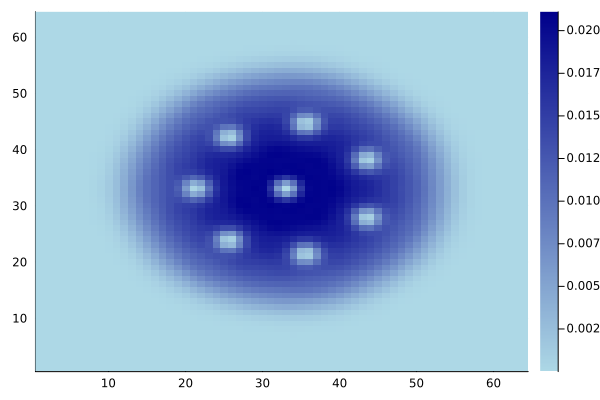

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)